In [3]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from scipy.signal import find_peaks, argrelextrema
import matplotlib.pyplot as plt
import glob
import os
import re

In [4]:
hist_data = r'C:\Users\david\fall2024\capstone\SHAZAM-CAPSTONE\histograms\histogram_data\song01_histogram_data.csv'
new_data = r'C:\Users\david\fall2024\capstone\SHAZAM-CAPSTONE\msaf\msaf_dataset\01_uptown_funk\cbm\01_uptown_funk_cbm_cnmf.csv'

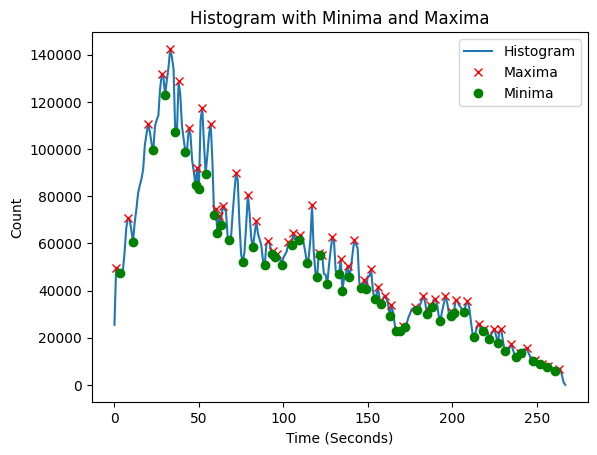

54


In [8]:
df = pd.read_csv(hist_data)
count = df['Count']
time = df['Second']
peaks, _ = find_peaks(count)

# Find troughs (minima)
troughs = argrelextrema(count.values, np.less)[0]

# Plot the histogram data along with the peaks and troughs
plt.plot(time, count, label='Histogram')
plt.plot(time[peaks], count[peaks], "x", label='Maxima', color='red')
plt.plot(time[troughs], count[troughs], "o", label='Minima', color='green')
plt.xlabel('Time (Seconds)')
plt.ylabel('Count')
plt.title('Histogram with Minima and Maxima')
plt.legend()
plt.show()

print(len(troughs))

In [5]:
hist_datas = r'C:\Users\david\fall2024\capstone\SHAZAM-CAPSTONE\histograms\histogram_data'
file_paths = glob.glob(os.path.join(hist_datas, '*.csv'))
file_paths.sort(key=lambda x: int(re.search(r'song(\d+)', x).group(1)))

In [6]:
# Create two folders to store hist min and max seperately
hist_max_path = r'C:\Users\david\fall2024\capstone\SHAZAM-CAPSTONE\histograms\hist_maxima'
hist_min_path = r'C:\Users\david\fall2024\capstone\SHAZAM-CAPSTONE\histograms\hist_minima'

In [7]:
for file in file_paths: 
    df = pd.read_csv(file)
    count = df['Count']
    time = df['Second']

    peaks, _ = find_peaks(count)

    troughs = argrelextrema(count.values, np.less)[0]

    # Save the maxima to a CSV file
    maxima_df = pd.DataFrame({
        'Second': time[peaks]
    })

    song_part = os.path.basename(file).split('_')[0]
    hist_maxima = os.path.join(hist_max_path, f'{song_part}_hist_maxima.csv')
    maxima_df.to_csv(hist_maxima, index=False)

    # Save the minima to a CSV file
    minima_df = pd.DataFrame({
        'Second': time[troughs]
    })
    hist_minima = os.path.join(hist_min_path, f'{song_part}_hist_minima.csv')
    minima_df.to_csv(hist_minima, index=False)